# Calculate Intrinsic Value of a Stock

## Import Packages to Extract and Present Data

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns
import plotly.express as px

# To extract and parse fundamental data like beta and growth estimates from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

## Enter  Financial Modeling Prep API Key and Ticker, to Obtain Financial Statements Data

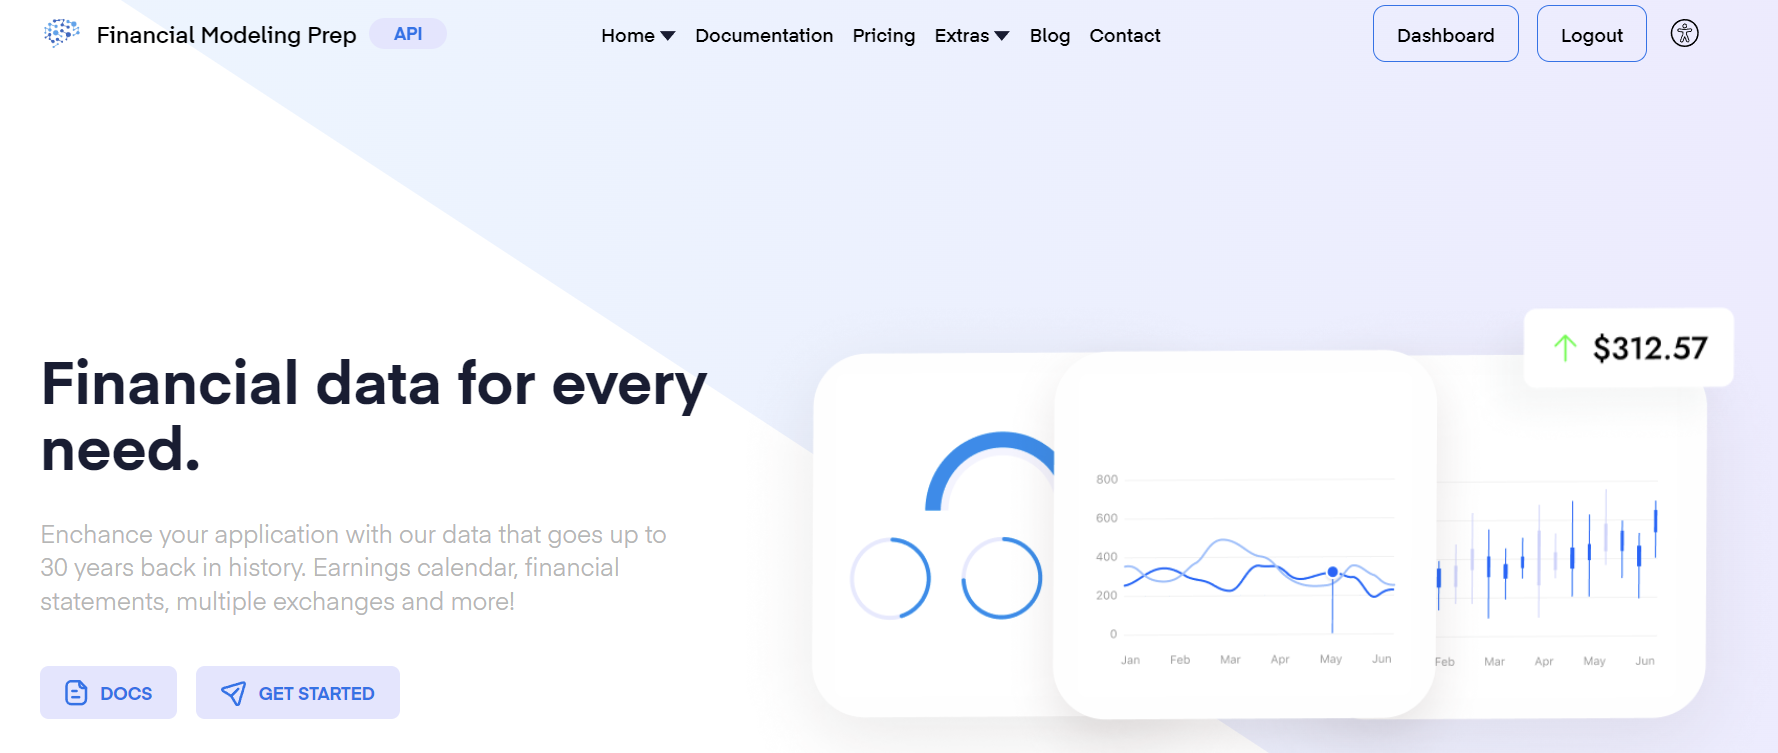

You need to sign up for an account at https://financialmodelingprep.com/developer to get an API key for free (250 requests). Financial Modelling Prep has many financial APIs endpoints (stock data, news, performance, financial statements, fundamental analysis) to work with.

Go to the Dashboard to obtain your API key. Enter your API key in the next cell to store it in the environment variable "FMP_API_KEY" (or use any other method such as using the cmd line to store it). In the following cell, we will then get the apikey stored in the environment variable to use for our requests later.

In [2]:
import os
# uncomment and enter API Key below
#os.environ['FMP_API_KEY'] = "your_api_key"

In [3]:
apiKey = os.environ['FMP_API_KEY']
ticker = "AAPL"
ticker = ticker.upper() # make sure ticker is caps

## Obtain Financial Statements Data from by Parsing JSON data from Financial Modeling Prep API

### Quarterly Cash Flow Statement (Most Recent 4 Quarters)

For summing up to calculate the most recent trailing twelve months (TTM) cash flow.
NOTE: Unfortunately for the free API, you will be unable to get quarterly data (only annual), in which case you can choose to just run the annual cash flow statement and use the end of last year's cash flow as the most recent cash flow (would eventually result in a less accurate estimate).

In [4]:
columns_drop = ['acceptedDate', 'period', 'symbol', 'reportedCurrency', 'cik', 'fillingDate', 'depreciationAndAmortization', 'link', 'finalLink']
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').drop(columns_drop, axis=1).iloc[:4] # extract for last 4 quarters
#q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')
latest_year = int(q_cash_flow_statement.iloc[0]['calendarYear'])
q_cash_flow_statement.iloc[:,4:].head()

changeInWorkingCapital  accountsReceivables   inventory  \
date                                                                  
2023-09-30             -6060000000          -9297000000   952000000   
2023-07-01             -2009000000          -1987000000   -22000000   
2023-04-01               231000000           5321000000  -741000000   
2022-12-31             -1497000000           4275000000 -1807000000   

            accountsPayables  otherWorkingCapital  otherNonCashItems  \
date                                                                   
2023-09-30       14901000000         -12616000000         -576000000   
2023-07-01        3974000000          -3974000000         3447000000   
2023-04-01      -14689000000          10340000000        -1415000000   
2022-12-31       -6075000000           2110000000         -317000000   

            netCashProvidedByOperatingActivities  \
date                                               
2023-09-30                           21598000000   
2023-07-01                           26380000000   
2023-04-01                           28560000000   
2022-12-31                           34005000000   

            investmentsInPropertyPlantAndEquipment  acquisitionsNet  \
date                                                                  
2023-09-30                             -2163000000                0   
2023-07-01                             -2093000000                0   
2023-04-01                             -2916000000                0   
2022-12-31                             -3787000000                0   

            purchasesOfInvestments  ...  dividendsPaid  \
date                                ...                  
2023-09-30             -8557000000  ...    -3758000000   
2023-07-01             -9759000000  ...    -3849000000   
2023-04-01             -6044000000  ...    -3650000000   
2022-12-31             -5153000000  ...    -3768000000   

            otherFinancingActivites  netCashUsedProvidedByFinancingActivities  \
date                                                                            
2023-09-30               1608000000                              -23153000000   
2023-07-01              -2438000000                              -24048000000   
2023-04-01               3484000000                              -25724000000   
2022-12-31              -2705000000                              -35563000000   

            effectOfForexChangesOnCash  netChangeInCash  cashAtEndOfPeriod  \
date                                                                         
2023-09-30                           0        839000000        30737000000   
2023-07-01                           0       2769000000        29898000000   
2023-04-01                           0       5155000000        27129000000   
2022-12-31                           0      -3003000000        21974000000   

            cashAtBeginningOfPeriod  operatingCashFlow  capitalExpenditure  \
date                                                                         
2023-09-30              29898000000        21598000000         -2163000000   
2023-07-01              27129000000        26380000000         -2093000000   
2023-04-01              21974000000        28560000000         -2916000000   
2022-12-31              24977000000        34005000000         -3787000000   

            freeCashFlow  
date                      
2023-09-30   19435000000  
2023-07-01   24287000000  
2023-04-01   25644000000  
2022-12-31   30218000000  

[4 rows x 26 columns]

### Annual Cash Flow Statement

In [5]:
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date').drop(columns_drop, axis=1)
#cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

changeInWorkingCapital  accountsReceivables   inventory  \
date                                                                  
2023-09-30             -6577000000          -1688000000 -1618000000   
2022-09-24              1200000000          -1823000000  1484000000   
2021-09-25             -4911000000         -10125000000 -2642000000   
2020-09-26              5690000000           6917000000  -127000000   
2019-09-28             -3488000000            245000000  -289000000   

            accountsPayables  otherWorkingCapital  otherNonCashItems  \
date                                                                   
2023-09-30       -1889000000           5195000000        -7422000000   
2022-09-24        9448000000          -7909000000          111000000   
2021-09-25       12326000000          -4470000000         -147000000   
2020-09-26       -4062000000           2962000000          -97000000   
2019-09-28       -1923000000          -1521000000         -652000000   

            netCashProvidedByOperatingActivities  \
date                                               
2023-09-30                          110543000000   
2022-09-24                          122151000000   
2021-09-25                          104038000000   
2020-09-26                           80674000000   
2019-09-28                           69391000000   

            investmentsInPropertyPlantAndEquipment  acquisitionsNet  \
date                                                                  
2023-09-30                            -10959000000                0   
2022-09-24                            -10708000000       -306000000   
2021-09-25                            -11085000000        -33000000   
2020-09-26                             -7309000000      -1524000000   
2019-09-28                            -10495000000       -624000000   

            purchasesOfInvestments  ...  dividendsPaid  \
date                                ...                  
2023-09-30            -29513000000  ...   -15025000000   
2022-09-24            -76923000000  ...   -14841000000   
2021-09-25           -109558000000  ...   -14467000000   
2020-09-26           -115148000000  ...   -14081000000   
2019-09-28            -40631000000  ...   -14119000000   

            otherFinancingActivites  netCashUsedProvidedByFinancingActivities  \
date                                                                            
2023-09-30              -6012000000                             -108488000000   
2022-09-24               3037000000                             -110749000000   
2021-09-25              14730000000                              -93353000000   
2020-09-26              12331000000                              -86820000000   
2019-09-28              -1936000000                              -90976000000   

            effectOfForexChangesOnCash  netChangeInCash  cashAtEndOfPeriod  \
date                                                                         
2023-09-30                           0       5760000000        30737000000   
2022-09-24                           0     -10952000000        24977000000   
2021-09-25                           0      -3860000000        35929000000   
2020-09-26                           0     -10435000000        39789000000   
2019-09-28                           0      24311000000        50224000000   

            cashAtBeginningOfPeriod  operatingCashFlow  capitalExpenditure  \
date                                                                         
2023-09-30              24977000000       110543000000        -10959000000   
2022-09-24              35929000000       122151000000        -10708000000   
2021-09-25              39789000000       104038000000        -11085000000   
2020-09-26              50224000000        80674000000         -7309000000   
2019-09-28              25913000000        69391000000        -10495000000   

            freeCashFlow  
date                      
2023-09-30   9958400000

### Cash Flow Statement (Annual + TTM)

In [6]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

C:\Users\damia\AppData\Local\Temp/ipykernel_50296/2380273774.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)


accountsReceivables   inventory  accountsPayables  \
date                                                            
TTM                 -1688000000 -1618000000       -1889000000   
2023-09-30          -1688000000 -1618000000       -1889000000   
2022-09-24          -1823000000  1484000000        9448000000   
2021-09-25         -10125000000 -2642000000       12326000000   
2020-09-26           6917000000  -127000000       -4062000000   

            otherWorkingCapital  otherNonCashItems  \
date                                                 
TTM                 -4140000000         1139000000   
2023-09-30           5195000000        -7422000000   
2022-09-24          -7909000000          111000000   
2021-09-25          -4470000000         -147000000   
2020-09-26           2962000000          -97000000   

            netCashProvidedByOperatingActivities  \
date                                               
TTM                                 110543000000   
2023-09-30                          110543000000   
2022-09-24                          122151000000   
2021-09-25                          104038000000   
2020-09-26                           80674000000   

            investmentsInPropertyPlantAndEquipment  acquisitionsNet  \
date                                                                  
TTM                                   -10959000000                0   
2023-09-30                            -10959000000                0   
2022-09-24                            -10708000000       -306000000   
2021-09-25                            -11085000000        -33000000   
2020-09-26                             -7309000000      -1524000000   

            purchasesOfInvestments  salesMaturitiesOfInvestments  ...  \
date                                                              ...   
TTM                   -29513000000                   45514000000  ...   
2023-09-30            -29513000000                   45514000000  ...   
2022-09-24            -76923000000                   67363000000  ...   
2021-09-25           -109558000000                  106483000000  ...   
2020-09-26           -115148000000                  120483000000  ...   

            dividendsPaid  otherFinancingActivites  \
date                                                 
TTM          -15025000000                -51000000   
2023-09-30   -15025000000              -6012000000   
2022-09-24   -14841000000               3037000000   
2021-09-25   -14467000000              14730000000   
2020-09-26   -14081000000              12331000000   

            netCashUsedProvidedByFinancingActivities  \
date                                                   
TTM                                    -108488000000   
2023-09-30                             -108488000000   
2022-09-24                             -110749000000   
2021-09-25                              -93353000000   
2020-09-26                              -86820000000   

            effectOfForexChangesOnCash  netChangeInCash  cashAtEndOfPeriod  \
date                                                                         
TTM                                  0       5760000000       109738000000   
2023-09-30                           0       5760000000        30737000000   
2022-09-24                           0     -10952000000        24977000000   
2021-09-25                           0      -3860000000        35929000000   
2020-09-26                           0     -10435000000        39789000000   

            cashAtBeginningOfPeriod  operatingCashFlow  capitalExpenditure  \
date                                                                         
TTM                    103978000000       110543000000        -10959000000   
2023-09-30              24977000000       110543000000        -10959000000   
2022-09-24              35929000000       122151000000        -10708000000   
2021-09-25              39789000000       104038000000        -11085000000   
2020-09-26     

### Check Stability of Free Cash Flows

DCF model works best only if the free cash flows are stable and steadily increasing. So let's plot the graph and verify if this is the case.

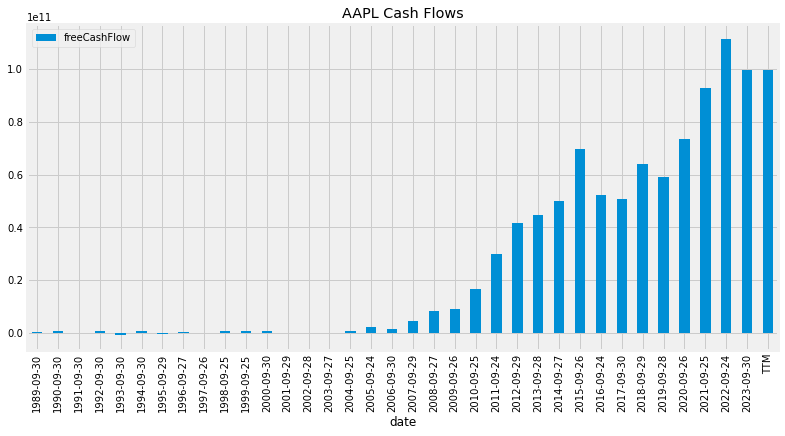

In [7]:
cash_flow_statement[['freeCashFlow']].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

### Same as Above but Plotted using Plotly

In [8]:
fig_cash_flow = px.bar(cash_flow_statement , y='freeCashFlow', title=ticker + ' Free Cash Flows')
fig_cash_flow.update_xaxes(type='category', tickangle=270, title='Date')
fig_cash_flow.update_yaxes(title='Free Cash Flows')
fig_cash_flow.show()

### Quarterly Balance Sheet Statement

To extract debt and cash & short term investments for the most recent quarter.

In [9]:
columns_drop = ['acceptedDate', 'calendarYear', 'period', 'symbol', 'reportedCurrency', 'cik', 'fillingDate', 'link', 'finalLink']
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date').drop(columns_drop, axis=1)
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

inventory  otherCurrentAssets  totalCurrentAssets  \
date                                                             
2023-09-30  6331000000         14695000000        143566000000   
2023-07-01  7351000000         13640000000        122659000000   
2023-04-01  7482000000         13660000000        112913000000   
2022-12-31  6820000000         16422000000        128777000000   
2022-09-24  4946000000         21223000000        135405000000   

            propertyPlantEquipmentNet  goodwill  intangibleAssets  \
date                                                                
2023-09-30                43715000000         0                 0   
2023-07-01                43550000000         0                 0   
2023-04-01                43398000000         0                 0   
2022-12-31                42951000000         0                 0   
2022-09-24                42117000000         0                 0   

            goodwillAndIntangibleAssets  longTermInvestments  taxAssets  \
date                                                                      
2023-09-30                            0         100544000000          0   
2023-07-01                            0         104061000000          0   
2023-04-01                            0         110461000000          0   
2022-12-31                            0         114095000000          0   
2022-09-24                            0         120805000000          0   

            otherNonCurrentAssets  ...  \
date                               ...   
2023-09-30            64758000000  ...   
2023-07-01            64768000000  ...   
2023-04-01            65388000000  ...   
2022-12-31            60924000000  ...   
2022-09-24            54428000000  ...   

            accumulatedOtherComprehensiveIncomeLoss  \
date                                                  
2023-09-30                             -11452000000   
2023-07-01                             -11801000000   
2023-04-01                             -11746000000   
2022-12-31                             -12912000000   
2022-09-24                             -11109000000   

            othertotalStockholdersEquity  totalStockholdersEquity  \
date                                                                
2023-09-30                             0              62146000000   
2023-07-01                             0              60274000000   
2023-04-01                             0              62158000000   
2022-12-31                             0              56727000000   
2022-09-24                             0              50672000000   

            totalEquity  totalLiabilitiesAndStockholdersEquity  \
date                                                             
2023-09-30  62146000000                           352583000000   
2023-07-01  60274000000                           335038000000   
2023-04-01  62158000000                           332160000000   
2022-12-31  56727000000                           346747000000   
2022-09-24  50672000000                           352755000000   

            minorityInterest  totalLiabilitiesAndTotalEquity  \
date                                                           
2023-09-30                 0                    352583000000   
2023-07-01                 0                    335038000000   
2023-04-01                 0                    332160000000   
2022-12-31                 0                    346747000000   
2022-09-24                 0                    352755000000   

            totalInvestments     totalDebt      netDebt  
date                                                     
2023-09-30      132134000000  111088000000  81123000000  
2023-07-01       34074000000  109280000000  80872000000  
2023-04-01       31185000000  109615000000  84928000000  
2022-12-31      144915000000  111110000000  90575000000  
2022-09-24      145463000000  120069000000  96423000000  

[5 rows x 40 columns]

## Free Cash Flow, Total Debt, Cash and Short Term Investments
Extracted from Dataframes Above

In [10]:
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow'] # ttm cash flow
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("TTM Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

TTM Free Cash Flow:  99584000000
Total Debt:  111088000000
Cash and ST Investments:  61555000000


# Extract and Parse Data from Finviz

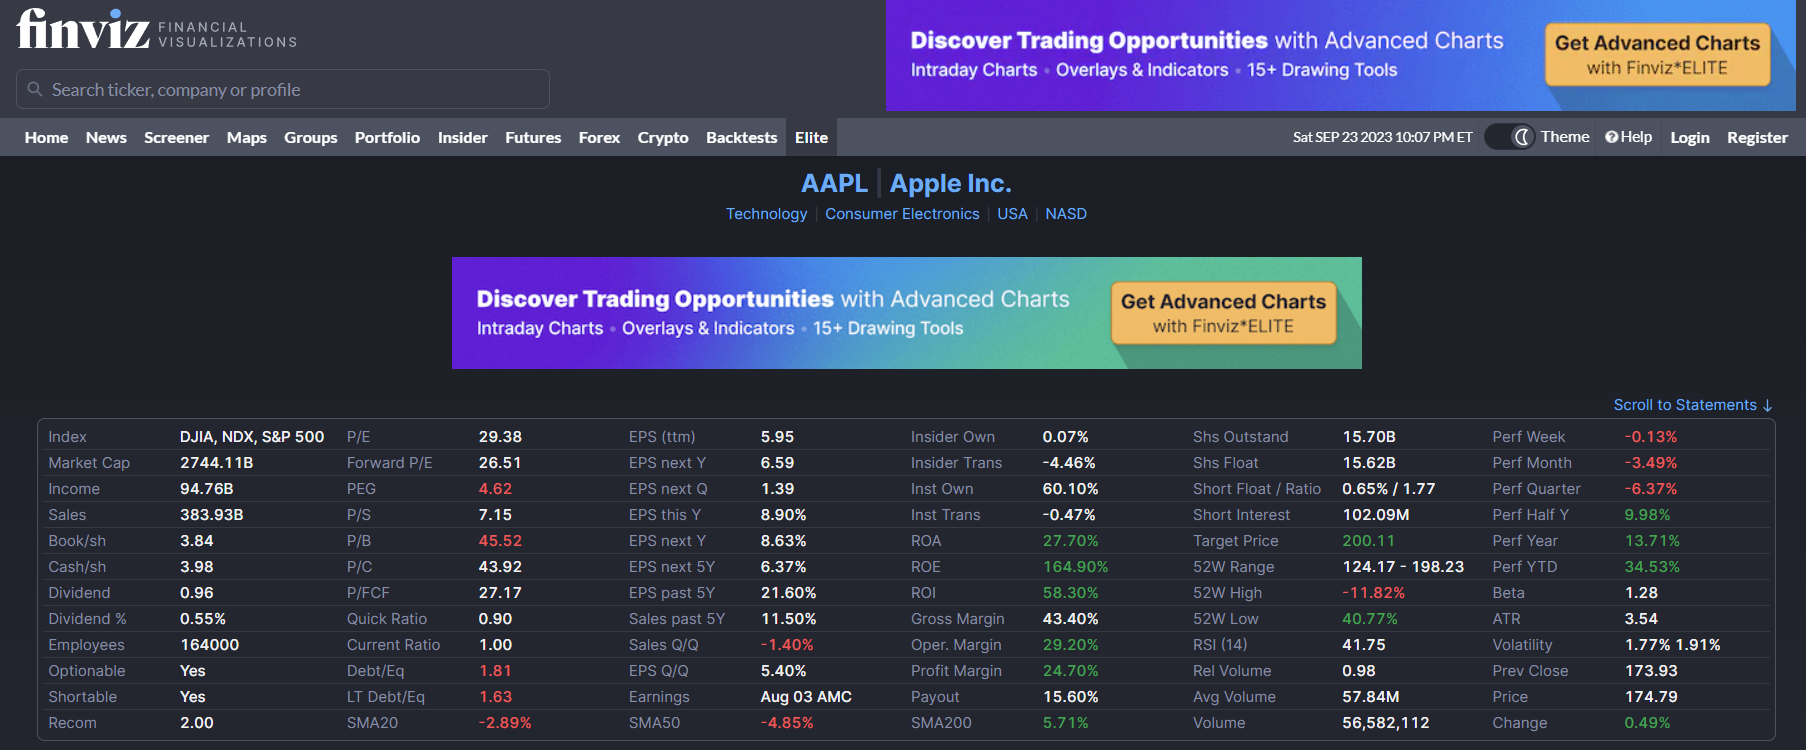

## Price, EPS next Y/5Y, Beta, Number of Shares Outstanding

Extract (using requests.get) and Parse (using Beautiful Soup) data from Finviz table in the Finviz website (see screenshot above), needed to calculate intrinsic value of stock.

In [11]:
# List of data we want to extract from Finviz Table
# Price is the current stock price
# EPS next Y is the estimated earnings growth for next year
# EPS next 5Y is the estimated earnings growth for next 5 years (if this is not present on finviz, we will use EPS next Y instead)
# Beta captures the volatility of the stock, used for estimating discount rate later
# Shs Outstand is the number of shares present in the market
metric = ['Price', 'EPS next Y', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find_all(text = metric)[-1].find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 186.4,
 'EPS next Y': 8.9,
 'EPS next 5Y': 6.14,
 'Beta': 1.32,
 'Shs Outstand': 15550000000.0}

## Estimate Discount Rate from Beta

Beta shows the volatility of the stock, the higher the beta, we want to be more conservative by increasing the discount rate also.

In [12]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)

Discount Rate:  8


In [13]:
finviz_data['EPS next 5Y']

6.14

In [14]:
finviz_data['EPS next Y']

8.9

## Print All Data Needed for Intrinsic Value Calculation
## Including EPS Growth 5Y, Shares Outstanding

In [15]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
# sometimes EPS next 5Y is empty and shows as a '-' string, in this case use EPS next Y
if isinstance(EPS_growth_5Y, str):
    if not EPS_growth_5Y.isdigit():
        EPS_growth_5Y = finviz_data['EPS next Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
# Long term = previous growth rate or around long term inflation rate, whichever is lower to be conservative estimate
long_term_growth_rate = np.minimum(EPS_growth_6Y_to_10Y, 3)      
shares_outstanding = finviz_data['Shs Outstand']

print("TTM Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("Long Term Growth Rate: ", long_term_growth_rate)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

TTM Free Cash Flow:  99584000000
Total Debt:  111088000000
Cash and ST Investments:  61555000000
EPS Growth 5Y:  6.14
EPS Growth 6Y to 10Y:  3.07
Long Term Growth Rate:  3.0
Discount Rate:  8
Shares Outstanding:  15550000000.0


## Calculate Intrinsic Value
1. First Project Cash Flows from Year 1 to Year 10 using Present (TTM) Free Cash Flow
2. Discount the Cash Flows to Present Value
3. Calculate the Terminal Value after Year 10 (Discounted to Present Value) Assuming the Company will Grow at a Constant Steady Rate Forever (https://corporatefinanceinstitute.com/resources/financial-modeling/dcf-terminal-value-formula/)
4. Add the Cash Flows and the Terminal Value Up
5. Then Account for the Cash + Short Term Investments and Subtract Total Debt
6. Divide by Total Number of Shares Outstanding

In [16]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, long_term_growth_rate,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    long_term_growth_rate_d = long_term_growth_rate/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year + latest_year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year + latest_year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year + latest_year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year + latest_year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df = df.set_index('Year')
    
    # Plot using matplotlib
    # df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    # plt.show()
    
    # Plot using plotly
    fig_cash_forecast = px.bar(df, barmode='group', title=ticker + ' Projected Free Cash Flows')
    fig_cash_forecast.update_xaxes(type='category', tickangle=270)
    fig_cash_forecast.update_xaxes(tickangle=270, title='Forecasted Year')
    fig_cash_forecast.update_yaxes(title='Free Cash Flows')
    fig_cash_forecast.show()

    # Growth in Perpuity Approach    
    print("Growth in Perpuity Approach\n")
    cashflow_10Y = cash_flow_discounted_list[-1]
    print("10th Year Cashflow: ", cashflow_10Y)
    print("Long Term Growth Rate: ", long_term_growth_rate)
    # Formula to Calculate: https://corporatefinanceinstitute.com/resources/financial-modeling/dcf-terminal-value-formula/
    terminal_value = cashflow_10Y*(1+long_term_growth_rate_d)/(discount_rate_d-long_term_growth_rate_d)
    print("Terminal Value: ", terminal_value)
    
    
    intrinsic_value = (sum(cash_flow_discounted_list) + terminal_value - total_debt + cash_and_ST_investments)/shares_outstanding
    
    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, long_term_growth_rate,
                                  shares_outstanding, discount_rate)    

Discounted Cash Flows

Year 2024: $97868942222.2222
Year 2025: $96183421550.61725
Year 2026: $94526929290.57883
Year 2027: $92898965508.35217
Year 2028: $91299038880.15276
Year 2029: $87131406827.56801
Year 2030: $83154019460.34659
Year 2031: $79358192460.9067
Year 2032: $75735637934.68196
Year 2033: $72278446314.14508


Growth in Perpuity Approach

10th Year Cashflow:  72278446314.14508
Long Term Growth Rate:  3.0
Terminal Value:  1488935994071.3884


## Print Intrinsic Value, Current Share Price, Margin of Safety

In [17]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)    

Intrinsic Value:  148.5426363035987
Current Price:  186.4
Margin of Safety:  -25.48585688153977


# Calculate Intrinsic Value for Different Discount Rates and Long Term Growth Rates

In [18]:
discount_rates = [discount_rate-2, discount_rate-1.5, 
                  discount_rate-1, discount_rate-0.5, 
                  discount_rate, 
                  discount_rate+0.5, discount_rate+1,
                  discount_rate+1.5, discount_rate+2]

In [19]:
long_term_growth_rates = [long_term_growth_rate-1, long_term_growth_rate-0.5, 
                          long_term_growth_rate, 
                          long_term_growth_rate+0.5, long_term_growth_rate+1]

In [20]:
intrinsic_values = {}
for dr in discount_rates:
    intrinsic_values[dr] = {}
    for lr in long_term_growth_rates:
        intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, lr,
                                  shares_outstanding, dr) 
        intrinsic_values[dr][lr] = intrinsic_value



Discounted Cash Flows

Year 2024: $99715526037.73582
Year 2025: $99847225789.1064
Year 2026: $99979099483.54485
Year 2027: $100111147350.78723
Year 2028: $100243369620.87317
Year 2029: $97472491573.80563
Year 2030: $94778204778.41646
Year 2031: $92158392136.89984
Year 2032: $89610995071.22893
Year 2033: $87134011905.5808


Growth in Perpuity Approach

10th Year Cashflow:  87134011905.5808
Long Term Growth Rate:  2.0
Terminal Value:  2221917303592.3105
Discounted Cash Flows

Year 2024: $99715526037.73582
Year 2025: $99847225789.1064
Year 2026: $99979099483.54485
Year 2027: $100111147350.78723
Year 2028: $100243369620.87317
Year 2029: $97472491573.80563
Year 2030: $94778204778.41646
Year 2031: $92158392136.89984
Year 2032: $89610995071.22893
Year 2033: $87134011905.5808


Growth in Perpuity Approach

10th Year Cashflow:  87134011905.5808
Long Term Growth Rate:  2.5
Terminal Value:  2551781777234.866
Discounted Cash Flows

Year 2024: $99715526037.73582
Year 2025: $99847225789.1064
Year 2026: $99979099483.54485
Year 2027: $100111147350.78723
Year 2028: $100243369620.87317
Year 2029: $97472491573.80563
Year 2030: $94778204778.41646
Year 2031: $92158392136.89984
Year 2032: $89610995071.22893
Year 2033: $87134011905.5808


Growth in Perpuity Approach

10th Year Cashflow:  87134011905.5808
Long Term Growth Rate:  3.0
Terminal Value:  2991601075424.9404
Discounted Cash Flows

Year 2024: $99715526037.73582
Year 2025: $99847225789.1064
Year 2026: $99979099483.54485
Year 2027: $100111147350.78723
Year 2028: $100243369620.87317
Year 2029: $97472491573.80563
Year 2030: $94778204778.41646
Year 2031: $92158392136.89984
Year 2032: $89610995071.22893
Year 2033: $87134011905.5808


Growth in Perpuity Approach

10th Year Cashflow:  87134011905.5808
Long Term Growth Rate:  3.5
Terminal Value:  3607348092891.046
Discounted Cash Flows

Year 2024: $99715526037.73582
Year 2025: $99847225789.1064
Year 2026: $99979099483.54485
Year 2027: $100111147350.78723
Year 2028: $100243369620.87317
Year 2029: $97472491573.80563
Year 2030: $94778204778.41646
Year 2031: $92158392136.89984
Year 2032: $89610995071.22893
Year 2033: $87134011905.5808


Growth in Perpuity Approach

10th Year Cashflow:  87134011905.5808
Long Term Growth Rate:  4.0
Terminal Value:  4530968619090.202
Discounted Cash Flows

Year 2024: $99247378028.169
Year 2025: $98911893933.4259
Year 2026: $98577543869.42557
Year 2027: $98244324002.82469
Year 2028: $97912230513.23769
Year 2029: $94758813136.14467
Year 2030: $91706956525.28104
Year 2031: $88753389756.43866
Year 2032: $85894947250.66791
Year 2033: $83128565381.468


Growth in Perpuity Approach

10th Year Cashflow:  83128565381.468
Long Term Growth Rate:  2.0
Terminal Value:  1884247481979.9417
Discounted Cash Flows

Year 2024: $99247378028.169
Year 2025: $98911893933.4259
Year 2026: $98577543869.42557
Year 2027: $98244324002.82469
Year 2028: $97912230513.23769
Year 2029: $94758813136.14467
Year 2030: $91706956525.28104
Year 2031: $88753389756.43866
Year 2032: $85894947250.66791
Year 2033: $83128565381.468


Growth in Perpuity Approach

10th Year Cashflow:  83128565381.468
Long Term Growth Rate:  2.5
Terminal Value:  2130169487900.1174
Discounted Cash Flows

Year 2024: $99247378028.169
Year 2025: $98911893933.4259
Year 2026: $98577543869.42557
Year 2027: $98244324002.82469
Year 2028: $97912230513.23769
Year 2029: $94758813136.14467
Year 2030: $91706956525.28104
Year 2031: $88753389756.43866
Year 2032: $85894947250.66791
Year 2033: $83128565381.468


Growth in Perpuity Approach

10th Year Cashflow:  83128565381.468
Long Term Growth Rate:  3.0
Terminal Value:  2446354924083.201
Discounted Cash Flows

Year 2024: $99247378028.169
Year 2025: $98911893933.4259
Year 2026: $98577543869.42557
Year 2027: $98244324002.82469
Year 2028: $97912230513.23769
Year 2029: $94758813136.14467
Year 2030: $91706956525.28104
Year 2031: $88753389756.43866
Year 2032: $85894947250.66791
Year 2033: $83128565381.468


Growth in Perpuity Approach

10th Year Cashflow:  83128565381.468
Long Term Growth Rate:  3.5
Terminal Value:  2867935505660.646
Discounted Cash Flows

Year 2024: $99247378028.169
Year 2025: $98911893933.4259
Year 2026: $98577543869.42557
Year 2027: $98244324002.82469
Year 2028: $97912230513.23769
Year 2029: $94758813136.14467
Year 2030: $91706956525.28104
Year 2031: $88753389756.43866
Year 2032: $85894947250.66791
Year 2033: $83128565381.468


Growth in Perpuity Approach

10th Year Cashflow:  83128565381.468
Long Term Growth Rate:  4.0
Terminal Value:  3458148319869.069
Discounted Cash Flows

Year 2024: $98783605233.64484
Year 2025: $97989643546.72021
Year 2026: $97202063234.1017
Year 2027: $96420813006.2388
Year 2028: $95645841985.8148
Year 2029: $92132868537.17693
Year 2030: $88748922991.83948
Year 2031: $85489266287.55977
Year 2032: $82349333422.97928
Year 2033: $79324727064.5465


Growth in Perpuity Approach

10th Year Cashflow:  79324727064.5465
Long Term Growth Rate:  2.0
Terminal Value:  1618224432116.7483
Discounted Cash Flows

Year 2024: $98783605233.64484
Year 2025: $97989643546.72021
Year 2026: $97202063234.1017
Year 2027: $96420813006.2388
Year 2028: $95645841985.8148
Year 2029: $92132868537.17693
Year 2030: $88748922991.83948
Year 2031: $85489266287.55977
Year 2032: $82349333422.97928
Year 2033: $79324727064.5465


Growth in Perpuity Approach

10th Year Cashflow:  79324727064.5465
Long Term Growth Rate:  2.5
Terminal Value:  1806841005359.1143
Discounted Cash Flows

Year 2024: $98783605233.64484
Year 2025: $97989643546.72021
Year 2026: $97202063234.1017
Year 2027: $96420813006.2388
Year 2028: $95645841985.8148
Year 2029: $92132868537.17693
Year 2030: $88748922991.83948
Year 2031: $85489266287.55977
Year 2032: $82349333422.97928
Year 2033: $79324727064.5465


Growth in Perpuity Approach

10th Year Cashflow:  79324727064.5465
Long Term Growth Rate:  3.0
Terminal Value:  2042611721912.072
Discounted Cash Flows

Year 2024: $98783605233.64484
Year 2025: $97989643546.72021
Year 2026: $97202063234.1017
Year 2027: $96420813006.2388
Year 2028: $95645841985.8148
Year 2029: $92132868537.17693
Year 2030: $88748922991.83948
Year 2031: $85489266287.55977
Year 2032: $82349333422.97928
Year 2033: $79324727064.5465


Growth in Perpuity Approach

10th Year Cashflow:  79324727064.5465
Long Term Growth Rate:  3.5
Terminal Value:  2345745500337.303
Discounted Cash Flows

Year 2024: $98783605233.64484
Year 2025: $97989643546.72021
Year 2026: $97202063234.1017
Year 2027: $96420813006.2388
Year 2028: $95645841985.8148
Year 2029: $92132868537.17693
Year 2030: $88748922991.83948
Year 2031: $85489266287.55977
Year 2032: $82349333422.97928
Year 2033: $79324727064.5465


Growth in Perpuity Approach

10th Year Cashflow:  79324727064.5465
Long Term Growth Rate:  4.0
Terminal Value:  2749923871570.945
Discounted Cash Flows

Year 2024: $98324146604.65115
Year 2025: $97080231819.69928
Year 2026: $95852054003.18959
Year 2027: $94639414064.17249
Year 2028: $93442115430.43039
Year 2029: $89591431045.71591
Year 2030: $85899430677.97153
Year 2031: $82359575069.56767
Year 2032: $78965594441.11945
Year 2033: $75711477386.4761


Growth in Perpuity Approach

10th Year Cashflow:  75711477386.4761
Long Term Growth Rate:  2.0
Terminal Value:  1404103762440.1025
Discounted Cash Flows

Year 2024: $98324146604.65115
Year 2025: $97080231819.69928
Year 2026: $95852054003.18959
Year 2027: $94639414064.17249
Year 2028: $93442115430.43039
Year 2029: $89591431045.71591
Year 2030: $85899430677.97153
Year 2031: $82359575069.56767
Year 2032: $78965594441.11945
Year 2033: $75711477386.4761


Growth in Perpuity Approach

10th Year Cashflow:  75711477386.4761
Long Term Growth Rate:  2.5
Terminal Value:  1552085286422.7603
Discounted Cash Flows

Year 2024: $98324146604.65115
Year 2025: $97080231819.69928
Year 2026: $95852054003.18959
Year 2027: $94639414064.17249
Year 2028: $93442115430.43039
Year 2029: $89591431045.71591
Year 2030: $85899430677.97153
Year 2031: $82359575069.56767
Year 2032: $78965594441.11945
Year 2033: $75711477386.4761


Growth in Perpuity Approach

10th Year Cashflow:  75711477386.4761
Long Term Growth Rate:  3.0
Terminal Value:  1732951593512.6753
Discounted Cash Flows

Year 2024: $98324146604.65115
Year 2025: $97080231819.69928
Year 2026: $95852054003.18959
Year 2027: $94639414064.17249
Year 2028: $93442115430.43039
Year 2029: $89591431045.71591
Year 2030: $85899430677.97153
Year 2031: $82359575069.56767
Year 2032: $78965594441.11945
Year 2033: $75711477386.4761


Growth in Perpuity Approach

10th Year Cashflow:  75711477386.4761
Long Term Growth Rate:  3.5
Terminal Value:  1959034477375.0693
Discounted Cash Flows

Year 2024: $98324146604.65115
Year 2025: $97080231819.69928
Year 2026: $95852054003.18959
Year 2027: $94639414064.17249
Year 2028: $93442115430.43039
Year 2029: $89591431045.71591
Year 2030: $85899430677.97153
Year 2031: $82359575069.56767
Year 2032: $78965594441.11945
Year 2033: $75711477386.4761


Growth in Perpuity Approach

10th Year Cashflow:  75711477386.4761
Long Term Growth Rate:  4.0
Terminal Value:  2249712470912.433
Discounted Cash Flows

Year 2024: $97868942222.2222
Year 2025: $96183421550.61725
Year 2026: $94526929290.57883
Year 2027: $92898965508.35217
Year 2028: $91299038880.15276
Year 2029: $87131406827.56801
Year 2030: $83154019460.34659
Year 2031: $79358192460.9067
Year 2032: $75735637934.68196
Year 2033: $72278446314.14508


Growth in Perpuity Approach

10th Year Cashflow:  72278446314.14508
Long Term Growth Rate:  2.0
Terminal Value:  1228733587340.4663
Discounted Cash Flows

Year 2024: $97868942222.2222
Year 2025: $96183421550.61725
Year 2026: $94526929290.57883
Year 2027: $92898965508.35217
Year 2028: $91299038880.15276
Year 2029: $87131406827.56801
Year 2030: $83154019460.34659
Year 2031: $79358192460.9067
Year 2032: $75735637934.68196
Year 2033: $72278446314.14508


Growth in Perpuity Approach

10th Year Cashflow:  72278446314.14508
Long Term Growth Rate:  2.5
Terminal Value:  1347007408581.7947
Discounted Cash Flows

Year 2024: $97868942222.2222
Year 2025: $96183421550.61725
Year 2026: $94526929290.57883
Year 2027: $92898965508.35217
Year 2028: $91299038880.15276
Year 2029: $87131406827.56801
Year 2030: $83154019460.34659
Year 2031: $79358192460.9067
Year 2032: $75735637934.68196
Year 2033: $72278446314.14508


Growth in Perpuity Approach

10th Year Cashflow:  72278446314.14508
Long Term Growth Rate:  3.0
Terminal Value:  1488935994071.3884
Discounted Cash Flows

Year 2024: $97868942222.2222
Year 2025: $96183421550.61725
Year 2026: $94526929290.57883
Year 2027: $92898965508.35217
Year 2028: $91299038880.15276
Year 2029: $87131406827.56801
Year 2030: $83154019460.34659
Year 2031: $79358192460.9067
Year 2032: $75735637934.68196
Year 2033: $72278446314.14508


Growth in Perpuity Approach

10th Year Cashflow:  72278446314.14508
Long Term Growth Rate:  3.5
Terminal Value:  1662404265225.3367
Discounted Cash Flows

Year 2024: $97868942222.2222
Year 2025: $96183421550.61725
Year 2026: $94526929290.57883
Year 2027: $92898965508.35217
Year 2028: $91299038880.15276
Year 2029: $87131406827.56801
Year 2030: $83154019460.34659
Year 2031: $79358192460.9067
Year 2032: $75735637934.68196
Year 2033: $72278446314.14508


Growth in Perpuity Approach

10th Year Cashflow:  72278446314.14508
Long Term Growth Rate:  4.0
Terminal Value:  1879239604167.7722
Discounted Cash Flows

Year 2024: $97417933271.88939
Year 2025: $95298980990.58377
Year 2026: $93226118362.58582
Year 2027: $91198342884.8374
Year 2028: $89214673859.87686
Year 2029: $84749828891.58995
Year 2030: $80508431924.94171
Year 2031: $76479300262.70729
Year 2032: $72651810857.85475
Year 2033: $69015872305.24507


Growth in Perpuity Approach

10th Year Cashflow:  69015872305.24507
Long Term Growth Rate:  2.0
Terminal Value:  1083018303866.9226
Discounted Cash Flows

Year 2024: $97417933271.88939
Year 2025: $95298980990.58377
Year 2026: $93226118362.58582
Year 2027: $91198342884.8374
Year 2028: $89214673859.87686
Year 2029: $84749828891.58995
Year 2030: $80508431924.94171
Year 2031: $76479300262.70729
Year 2032: $72651810857.85475
Year 2033: $69015872305.24507


Growth in Perpuity Approach

10th Year Cashflow:  69015872305.24507
Long Term Growth Rate:  2.5
Terminal Value:  1179021151881.2698
Discounted Cash Flows

Year 2024: $97417933271.88939
Year 2025: $95298980990.58377
Year 2026: $93226118362.58582
Year 2027: $91198342884.8374
Year 2028: $89214673859.87686
Year 2029: $84749828891.58995
Year 2030: $80508431924.94171
Year 2031: $76479300262.70729
Year 2032: $72651810857.85475
Year 2033: $69015872305.24507


Growth in Perpuity Approach

10th Year Cashflow:  69015872305.24507
Long Term Growth Rate:  3.0
Terminal Value:  1292479063170.953
Discounted Cash Flows

Year 2024: $97417933271.88939
Year 2025: $95298980990.58377
Year 2026: $93226118362.58582
Year 2027: $91198342884.8374
Year 2028: $89214673859.87686
Year 2029: $84749828891.58995
Year 2030: $80508431924.94171
Year 2031: $76479300262.70729
Year 2032: $72651810857.85475
Year 2033: $69015872305.24507


Growth in Perpuity Approach

10th Year Cashflow:  69015872305.24507
Long Term Growth Rate:  3.5
Terminal Value:  1428628556718.573
Discounted Cash Flows

Year 2024: $97417933271.88939
Year 2025: $95298980990.58377
Year 2026: $93226118362.58582
Year 2027: $91198342884.8374
Year 2028: $89214673859.87686
Year 2029: $84749828891.58995
Year 2030: $80508431924.94171
Year 2031: $76479300262.70729
Year 2032: $72651810857.85475
Year 2033: $69015872305.24507


Growth in Perpuity Approach

10th Year Cashflow:  69015872305.24507
Long Term Growth Rate:  4.0
Terminal Value:  1595033493276.775
Discounted Cash Flows

Year 2024: $96971062018.3486
Year 2025: $94426683693.83044
Year 2026: $91949066121.68039
Year 2027: $89536457597.75371
Year 2028: $87187152380.05116
Year 2029: $82443851337.7236
Year 2030: $77958603278.708
Year 2031: $73717369173.72873
Year 2032: $69706873768.22218
Year 2033: $65914564030.18954


Growth in Perpuity Approach

10th Year Cashflow:  65914564030.18954
Long Term Growth Rate:  2.0
Terminal Value:  960469361582.762
Discounted Cash Flows

Year 2024: $96971062018.3486
Year 2025: $94426683693.83044
Year 2026: $91949066121.68039
Year 2027: $89536457597.75371
Year 2028: $87187152380.05116
Year 2029: $82443851337.7236
Year 2030: $77958603278.708
Year 2031: $73717369173.72873
Year 2032: $69706873768.22218
Year 2033: $65914564030.18954


Growth in Perpuity Approach

10th Year Cashflow:  65914564030.18954
Long Term Growth Rate:  2.5
Terminal Value:  1039421971245.2964
Discounted Cash Flows

Year 2024: $96971062018.3486
Year 2025: $94426683693.83044
Year 2026: $91949066121.68039
Year 2027: $89536457597.75371
Year 2028: $87187152380.05116
Year 2029: $82443851337.7236
Year 2030: $77958603278.708
Year 2031: $73717369173.72873
Year 2032: $69706873768.22218
Year 2033: $65914564030.18954


Growth in Perpuity Approach

10th Year Cashflow:  65914564030.18954
Long Term Growth Rate:  3.0
Terminal Value:  1131533349184.9204
Discounted Cash Flows

Year 2024: $96971062018.3486
Year 2025: $94426683693.83044
Year 2026: $91949066121.68039
Year 2027: $89536457597.75371
Year 2028: $87187152380.05116
Year 2029: $82443851337.7236
Year 2030: $77958603278.708
Year 2031: $73717369173.72873
Year 2032: $69706873768.22218
Year 2033: $65914564030.18954


Growth in Perpuity Approach

10th Year Cashflow:  65914564030.18954
Long Term Growth Rate:  3.5
Terminal Value:  1240392250386.294
Discounted Cash Flows

Year 2024: $96971062018.3486
Year 2025: $94426683693.83044
Year 2026: $91949066121.68039
Year 2027: $89536457597.75371
Year 2028: $87187152380.05116
Year 2029: $82443851337.7236
Year 2030: $77958603278.708
Year 2031: $73717369173.72873
Year 2032: $69706873768.22218
Year 2033: $65914564030.18954


Growth in Perpuity Approach

10th Year Cashflow:  65914564030.18954
Long Term Growth Rate:  4.0
Terminal Value:  1371022931827.9424
Discounted Cash Flows

Year 2024: $96528271780.8219
Year 2025: $93566308372.75284
Year 2026: $90695232608.98618
Year 2027: $87912255608.38167
Year 2028: $85214674066.42583
Year 2029: $80210743890.65306
Year 2030: $75500651806.48047
Year 2031: $71067143211.81682
Year 2032: $66893976720.01789
Year 2033: $62965864662.39492


Growth in Perpuity Approach

10th Year Cashflow:  62965864662.39492
Long Term Growth Rate:  2.0
Terminal Value:  856335759408.571
Discounted Cash Flows

Year 2024: $96528271780.8219
Year 2025: $93566308372.75284
Year 2026: $90695232608.98618
Year 2027: $87912255608.38167
Year 2028: $85214674066.42583
Year 2029: $80210743890.65306
Year 2030: $75500651806.48047
Year 2031: $71067143211.81682
Year 2032: $66893976720.01789
Year 2033: $62965864662.39492


Growth in Perpuity Approach

10th Year Cashflow:  62965864662.39492
Long Term Growth Rate:  2.5
Terminal Value:  922000161127.9254
Discounted Cash Flows

Year 2024: $96528271780.8219
Year 2025: $93566308372.75284
Year 2026: $90695232608.98618
Year 2027: $87912255608.38167
Year 2028: $85214674066.42583
Year 2029: $80210743890.65306
Year 2030: $75500651806.48047
Year 2031: $71067143211.81682
Year 2032: $66893976720.01789
Year 2033: $62965864662.39492


Growth in Perpuity Approach

10th Year Cashflow:  62965864662.39492
Long Term Growth Rate:  3.0
Terminal Value:  997766778496.4117
Discounted Cash Flows

Year 2024: $96528271780.8219
Year 2025: $93566308372.75284
Year 2026: $90695232608.98618
Year 2027: $87912255608.38167
Year 2028: $85214674066.42583
Year 2029: $80210743890.65306
Year 2030: $75500651806.48047
Year 2031: $71067143211.81682
Year 2032: $66893976720.01789
Year 2033: $62965864662.39492


Growth in Perpuity Approach

10th Year Cashflow:  62965864662.39492
Long Term Growth Rate:  3.5
Terminal Value:  1086161165426.3123
Discounted Cash Flows

Year 2024: $96528271780.8219
Year 2025: $93566308372.75284
Year 2026: $90695232608.98618
Year 2027: $87912255608.38167
Year 2028: $85214674066.42583
Year 2029: $80210743890.65306
Year 2030: $75500651806.48047
Year 2031: $71067143211.81682
Year 2032: $66893976720.01789
Year 2033: $62965864662.39492


Growth in Perpuity Approach

10th Year Cashflow:  62965864662.39492
Long Term Growth Rate:  4.0
Terminal Value:  1190627259070.7402
Discounted Cash Flows

Year 2024: $96089506909.09088
Year 2025: $92717638757.55368
Year 2026: $89464092524.78859
Year 2027: $86324716187.10056
Year 2028: $83295503419.08046
Year 2029: $78047886703.67838
Year 2030: $73130869841.34662
Year 2031: $68523625041.34178
Year 2032: $64206636663.737236
Year 2033: $60161618553.92178


Growth in Perpuity Approach

10th Year Cashflow:  60161618553.92178
Long Term Growth Rate:  2.0
Terminal Value:  767060636562.5028
Discounted Cash Flows

Year 2024: $96089506909.09088
Year 2025: $92717638757.55368
Year 2026: $89464092524.78859
Year 2027: $86324716187.10056
Year 2028: $83295503419.08046
Year 2029: $78047886703.67838
Year 2030: $73130869841.34662
Year 2031: $68523625041.34178
Year 2032: $64206636663.737236
Year 2033: $60161618553.92178


Growth in Perpuity Approach

10th Year Cashflow:  60161618553.92178
Long Term Growth Rate:  2.5
Terminal Value:  822208786903.5975
Discounted Cash Flows

Year 2024: $96089506909.09088
Year 2025: $92717638757.55368
Year 2026: $89464092524.78859
Year 2027: $86324716187.10056
Year 2028: $83295503419.08046
Year 2029: $78047886703.67838
Year 2030: $73130869841.34662
Year 2031: $68523625041.34178
Year 2032: $64206636663.737236
Year 2033: $60161618553.92178


Growth in Perpuity Approach

10th Year Cashflow:  60161618553.92178
Long Term Growth Rate:  3.0
Terminal Value:  885235244436.2776
Discounted Cash Flows

Year 2024: $96089506909.09088
Year 2025: $92717638757.55368
Year 2026: $89464092524.78859
Year 2027: $86324716187.10056
Year 2028: $83295503419.08046
Year 2029: $78047886703.67838
Year 2030: $73130869841.34662
Year 2031: $68523625041.34178
Year 2032: $64206636663.737236
Year 2033: $60161618553.92178


Growth in Perpuity Approach

10th Year Cashflow:  60161618553.92178
Long Term Growth Rate:  3.5
Terminal Value:  957958080050.9083
Discounted Cash Flows

Year 2024: $96089506909.09088
Year 2025: $92717638757.55368
Year 2026: $89464092524.78859
Year 2027: $86324716187.10056
Year 2028: $83295503419.08046
Year 2029: $78047886703.67838
Year 2030: $73130869841.34662
Year 2031: $68523625041.34178
Year 2032: $64206636663.737236
Year 2033: $60161618553.92178


Growth in Perpuity Approach

10th Year Cashflow:  60161618553.92178
Long Term Growth Rate:  4.0
Terminal Value:  1042801388267.9775


In [21]:
df_intrinsic_values = pd.DataFrame(intrinsic_values).T
df_intrinsic_values.index.name = 'Discount Rates'
df_intrinsic_values.columns = pd.MultiIndex.from_product([['Long Term Growth Rates'], df_intrinsic_values.columns])
df_intrinsic_values

Long Term Growth Rates                                      \
                                  2.0         2.5         3.0         3.5   
Discount Rates                                                              
6.0                        201.507059  222.720208  251.004408  290.602287   
6.5                        178.254053  194.068973  214.402442  241.513733   
7.0                        159.664213  171.793897  186.956000  206.450134   
7.5                        144.465353  153.981849  165.613123  180.152215   
8.0                        131.809363  139.415396  148.542636  159.698152   
8.5                        121.109106  127.282923  134.579251  143.334846   
9.0                        111.945212  117.022550  122.946111  129.946684   
9.5                        104.010153  108.232944  113.105396  118.789922   
10.0                        97.073295  100.619799  104.672948  109.349658   

                            
                       4.0  
Discount Rates              
6.0             349.999105  
6.5             279.469541  
7.0             232.442312  
7.5             198.845334  
8.0             173.642547  
8.5             154.036128  
9.0             138.347371  
9.5             125.507999  
10.0            114.805819